In [1]:
#This notebook uses machine learning to come up with a simple trading/investment strategy

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
#read csv data from /stock_data
df = pd.read_csv('data/stock_data/HistoricalData_AAPL1Y_20220904.csv')

In [3]:
#set index to date
df = df.set_index(pd.DatetimeIndex(df['Date']))
#drop date column
df = df.drop(columns=['Date'], axis = 'columns')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-03,153.759995,154.630005,153.089996,154.300003,153.440186,57808700
2021-09-07,154.970001,157.259995,154.389999,156.690002,155.816879,82278300
2021-09-08,156.979996,157.039993,153.979996,155.110001,154.245682,74420200
2021-09-09,155.490005,156.110001,153.949997,154.070007,153.211487,57305700
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139893,140893200
...,...,...,...,...,...,...
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000
2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100


In [4]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']


In [5]:
# Store the independent variables in a new variable called 'X'
X = df[['High-Low', 'Open-Close', 'Close']]


,High-Low,Open-Close,Close
Date,,,
2021-09-03,1.540009,-0.540008,154.300003
2021-09-07,2.869996,-1.720001,156.690002
2021-09-08,3.059997,1.869995,155.110001
2021-09-09,2.160004,1.419998,154.070007
2021-09-10,6.779999,6.029999,148.970001


In [6]:
# Store target variable in a new variable called 'y': if tomorrows close price is greater than todays close price, then y = 1, else y = 0
# 1 indicate to buy by today and sell by tomorrow and 0 indicates no action
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [8]:
# Get the percentage to split the data into training (90%) and testing sets (10%)
split_percentage = 0.9
row = int(df.shape[0] * split_percentage)

# Cretate the training data set
X_train = X[:row]
y_train = y[:row]

# Create the testing data set
X_test = X[row:]
y_test = y[row:]

In [9]:
# import library for Support Vector Classification
from sklearn.svm import SVC

# Create model
model = SVC()

# Train the model
model.fit(X_train[['Open-Close','High-Low']], y_train)

SVC()

In [10]:
# Check the score of the model on the train dataset
model.score(X_train[['Open-Close','High-Low']], y_train)

0.584070796460177

In [11]:
# Check the score of the model on the test dataset
model.score(X_test[['Open-Close','High-Low']], y_test)

0.46153846153846156

In [12]:
# Make and show the model predictions
df['predictions'] = model.predict(X[['Open-Close','High-Low']])

# Show predictions
df['predictions']

Date
2021-09-03    1
2021-09-07    1
2021-09-08    0
2021-09-09    0
2021-09-10    0
             ..
2022-08-29    1
2022-08-30    0
2022-08-31    0
2022-09-01    1
2022-09-02    0
Name: predictions, Length: 252, dtype: int64

In [16]:
# Calculate the daily returns from the stock
df['returns'] = df['Close'].pct_change(1)
# Show the returns
df['returns']

Date
2021-09-03         NaN
2021-09-07    0.015489
2021-09-08   -0.010084
2021-09-09   -0.006705
2021-09-10   -0.033102
                ...   
2022-08-29   -0.013690
2022-08-30   -0.015305
2022-08-31   -0.010635
2022-09-01    0.004707
2022-09-02   -0.013611
Name: returns, Length: 252, dtype: float64

In [15]:
# Calculate the strategy returns
df['strategy_returns'] = df['predictions'].shift(1) * df['returns']
# Show the strategy returns
df['strategy_returns']

Date
2021-09-03         NaN
2021-09-07    0.015489
2021-09-08   -0.010084
2021-09-09   -0.000000
2021-09-10   -0.000000
                ...   
2022-08-29   -0.000000
2022-08-30   -0.015305
2022-08-31   -0.000000
2022-09-01    0.000000
2022-09-02   -0.013611
Name: strategy_returns, Length: 252, dtype: float64

In [17]:
# Calculate the cumulative strategy returns
df['Cumulate_Strategy'] = df['strategy_returns'].cumsum()

# Calculate the cumulative market returns
df['Cumulative Market'] = df['returns'].cumsum()

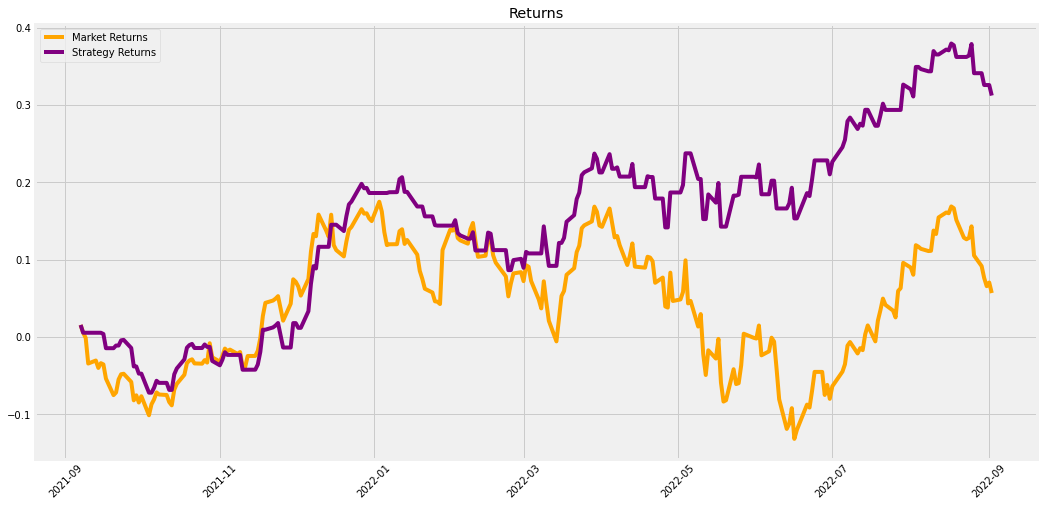

In [20]:
# Visualize and show the data
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumulative Market'], color='orange', label='Market Returns')
plt.plot(df['Cumulate_Strategy'], color='purple', label='Strategy Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
# Print the returns
print('Market Returns: ', df['Cumulative Market'][-1]*100, '%')
print('Strategy Returns: ', df['Cumulate_Strategy'][-1]*100, '%')

Market Returns:  5.675151571355908 %
Strategy Returns:  31.208633327619328 %
